In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io

#from scipy.misc import imread

import codecs
from IPython.display import HTML

import imageio

In [2]:
mov = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")


In [3]:
mov.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# changing the genres column from json to string

movies['genres'] = movies['genres'].apply(json.loads)

for index, i in zip(movies.index, movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)
    
    
    
# changing the keywords column from json to string

movies['keywords'] = movies['keywords'].apply(json.loads)

for index, i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
    
    
## changing the production_companies column from json to string

movies['production_companies'] = movies['production_companies'].apply(json.loads)

for index, i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
    
    
# changing the production_countries column from json to string    

movies['production_countries'] = movies['production_countries'].apply(json.loads)

for index,i in zip(movies.index,movies['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries'] = str(list1)
    
    
# changing the cast column from json to string

mov['cast'] = mov['cast'].apply(json.loads)

for index, i in zip(mov.index, mov['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    

mov['crew'] = mov['crew'].apply(json.loads)

def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
        
mov['crew'] = mov['crew'].apply(director)
mov.rename(columns = {'crew':'director'}, inplace = True)

In [6]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
mov.head(2)

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski


In [8]:
#So now we have our dataset cleaned. Lets start building our score prediction system.

In [9]:
movies = movies.merge(mov, left_on = 'id', right_on = 'movie_id', how = 'left') # merging the two csv files

In [10]:
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [11]:
#Working with the genres column

In [12]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

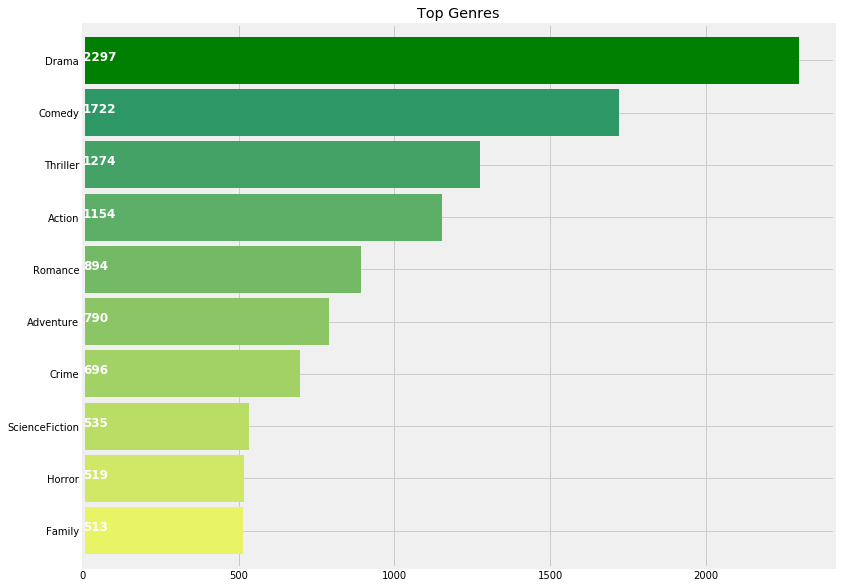

In [13]:
plt.subplots(figsize = (12,10))
list1 = []

for i in movies['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending = True).plot.barh(width = 0.9, color = sns.color_palette('summer_r', 10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending = True).values): 
    ax.text(.8, i, v, fontsize = 12, color = 'white', weight = 'bold')

ax.patches[9].set_facecolor('g')
plt.title('Top Genres')
plt.show()

In [14]:
#Drama looks to be the most popular genre followed by Comedy.

In [15]:
for i, j in zip(movies['genres'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'genres'] = str(list2)
    
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [16]:
#Now lets generate a list 'genreList' with all possible unique genres mentioned in the dataset.

In [17]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

In [18]:
#now we have a list with unique genres
genreList[:10] 

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [19]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [20]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))

In [21]:
movies['genres_bin'].head(4)

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [22]:
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast']=movies['cast'].str.split(',')

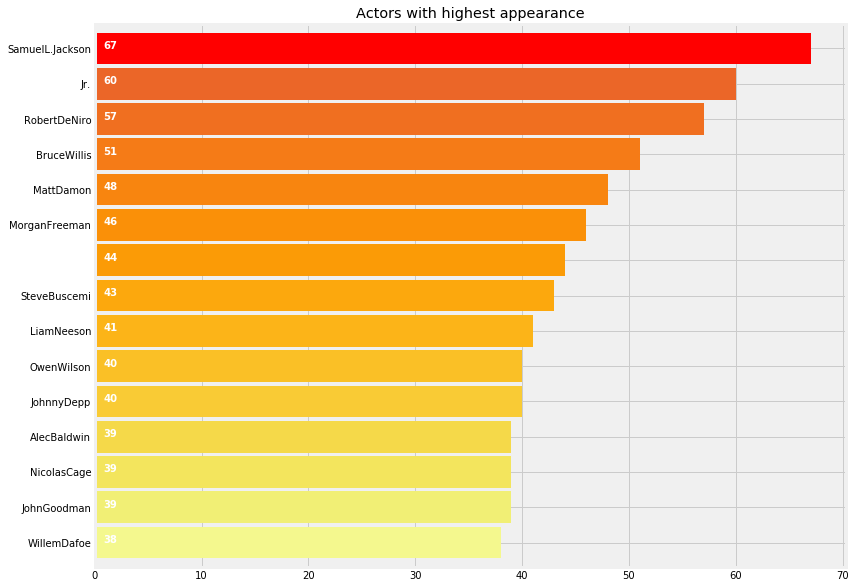

In [23]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('r')
plt.show()

In [24]:
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i[:4]
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')

In [25]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [26]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [27]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))

In [28]:
movies['cast_bin'].head(2)

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

In [29]:
#Working with the director column

In [30]:
def xstr(s):
    if s is None:
        return ''
    return str(s)

movies['director'] = movies['director'].apply(xstr)

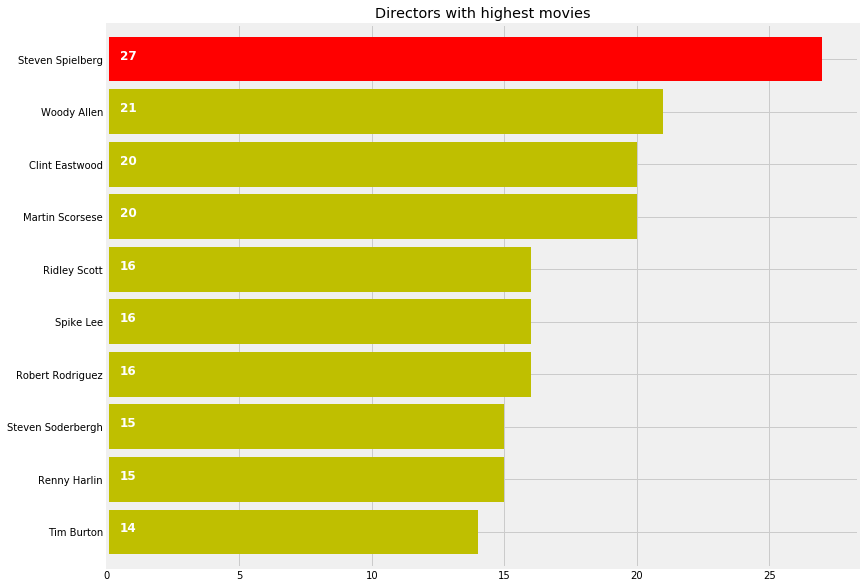

In [31]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='y')
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()

In [32]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [33]:
def binary(director_list):
    binaryList = []
    
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [34]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))

In [ ]:
#Working with the keywords column

In [35]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Black\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
mask=b'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAADiJJREFUeNrs3Wtu47oShVHR8PynzP7TDQSBO/FDIovcaw3gIleWWJ/K6ZzWez8AgCw3lwAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAUMDdJQA4V2utX/m/33tvrjIf36e9d1cBoNiQFwcIAAADXxQgAAAMfDGAAAAw8AUBAgDA0BcDCAAAQ18MIAAAgx8hsMv9/Oln4+8AAIY+T11DMbDXPW0DADgksRVY7J4+4zOwAQAMft66zkJg7XtaAAAOSYRA4D3tKwDAIckphMCYe/qs62wDABj82AgE3tM2AICDEhuBRe7pM6+pDQBg8HPZZyYC6t7TAgBwSHL55ycE6t3PvgIAHJYMkRwBZ9zLZ18/GwDA4Mc2IPBeLr0BsDoCwx/bAPfxNdfrvsqFFAFg+GMb4P4N2AA8upAiAAx+bAPS7t+rrs/NRQY817gH3vu5V75/S24AfrugNgHg4McmIOGevfKaLPmvAPxOABj+7HtPVDvfd71Xy20AZv1JRMCBim1ApXv06mvg7wAAhj8l75PREZB2b5baALxz8W0BwODHJmC3+3LEbFt+A+D3AcDwxybAvbjwBuDTD0UEgOGPTcAO99+oebZNAIgAMPwRAavfcyPn2Fa/BOjrADD82fue+n7Gu88W3wCs8B9NAAx/2OXt/zgW+1PADh/w/AECwCEEgLf/VQPgykEtAkB4g+EftgFwIIFnDQz/4ABwMIFnDCgWACMPDQcUeLbA23/YBgAw/MHwLxIAMw4OhxUAhG4ARAB4liD97T8yABxc4BmC9OF/HJP+FHClw8OfDQbDHxLnTfwvATrMAEh82fSvAEQAeFYgbPgLAAcbeEYgcPgLAAccAIHDf0oAVB+yIgA8F7Drc/z1WbYBcNiB5wE2fvv/Ovi//lx3H9P/L5h/IgjAioP/mXC3AfDmA54B2GT4f1/z//Tz2QDYBACw8PB/JtQf/XxD/xLgym8TIgBv/0Cl+fDsM/q/n88GwCYADH9YZPif+WwKgDcuvBAAYNQs+GTo//QzCgDbAACKDf8z3vR/+xkFgAiA0w8eMPzrP3cCQAQAMGHwXzn0n/lZBYAIAG//MGD4j3q+nv1ZBYAIAOCC4T8jqF/5WYcFwO5vFv6FAN7+IXfwr/j82ADYBgDwwvCvOuxfnT0CQASAt394MERXei7emTkC4OIDVQgAiOFqw/84/NcA3Uy4R92jsKxPXjIFgAMWgEACQAQAEPb2LwAmRIAQQJgCs4e/AHDoAhA4/AWACAAgcPgLgAIRIAQQocDo4S8AHMQABA5/AWAbAEDg8BcAtgG4z4BQAsDhDEDY278AKB4BQgDA8BcAtgEAGP4CwDYARCUY/gLAwQ2A4S8AbAMAMPwFgBAAwPCfEwAz/s+lhICrgPsFDH8bANsAAAx/AeDtDgDDXwDYBgAQP/wFgBAAIHD4C4CQEHAVAAz/7+4+jpwI8C8x3AeuAhj8UzYABtD8AWAIABj+wwMAIQBg+AsAhACA4S8AmBkCrgJAzvAXANgGAAQO/+M4jtb7+DPfoHEDc3juwLlpA4CNAIDhLwAQAgCGvwBACAAY/mfzlwB5OQRWv+mTPzfA4J+6ATA8bAQADP/AAEAIABj+c/kKgNNCYMcHBGDXs23K3wF4NDTwsOBZA2fZOL4C4NKhY/AA1OQrAIa+fdoKANgAGAa2AgDYAGArAEDEBgBsBQBCA8DbH99DQAwA2AAgBsSA0AYEAMkx4EoAbBYA3k6wFQAYy78CYNkYEJAAi28AHOLYDADYAMApmwFhCbDABsBhje0AgA0AXLodEJuAACim9968rTEyBgQBIABAEAgCQADYAiAIBAEgAEAQLBwFwhpYIgAcVogCABsAEAUAKQFgC8CuUSAMAAEgAhAG4gAQAMDPcfBJIAhqYKkAcGjBa4FwZjQAAgAIiwZgX7dVflBvLwAQGAAiAABCAwAACA0AWwAACN0AiAAACAwAACA0AGwBACB0AyACACAwAEQAAIQGgAgAwHwJDQARAAChAQAAhAaALQAAhG4ARAAABAaACACA0AAQAQBQIABaa7211kUAAARuAGaEgAgAgMkBMCsERAAAFAiAGSEgAgAwN4oEwPcQuDoGRAAAFAqAkVsBEQAAhf8Z4JVbAREAQLr7Cj/k1wg4a3j/+9+Z8c8TAcAGYPJmwDYAAAEQGgMiAIA0913+jzyKgFcGu68EABAAwVHQe28iAIDdtd7HzDpDFYBVJHw1fPMxA0AeAQAAAgAAEAAAgAAAAAQAAGwn5Y/DCQAAsAFQVAAgAAAAAQAACAAAQAD8zu8BAFBZ0pyyAQAAGwAAQAAAAAIAABAAb/GLgABUlDafbAAAwAYAABAAF/E1AADYAAAAAgAAxkrcTN9cbACwAQAABAAAIABO5msAAGZLnUU2AAAgAAAAATCArwEAwAYAALyEpgSALQAA2AAAACkBYAsAADYAAODFMyUAbAEAwAYAAEgJAFsAALABAAAvmykB4IMBABsAACAlAGwBADBfbAAAgJQAUGkAELoBEAEAEBgAAOClMjQAfGAAYAMAAKQEgC0AAOZI6AbAhwcAgQEgAgAgNAAAwMtjaAD4IAEgdAMgAgAgMABEAABmRWgAAAChAaDsACB0AyACADAfAgPAhwwAoQEgAgAgNABEAADmQWgA+NABIDQARAAAhAaACADI5fwPDwA3AQCEBoAIAPD2T2gAuCEAIDQARAAAhAaACABwxhMaAG4QADiO1nvPvgCtdbcBgJc7GwA3DAAIABEAAAJABADgDBcA+91AbiIABICSBMCZLQBsAwBAAChLAFhU/N8BeOli+ZsBAF7SbAAybzQ3GwACQHEC4CwWALYBALAGvwNw1oX0+wEA3v5tAGwEAMAGwEYAAG//pdxdgutvUDEAgA2ArQAA3v5tAGwFAEAAiAEAGMBXANU+EDEA8OuLEzYA29/gggCAK/g7ALYBAN7+bQDyBmuVm8qwB0AAFBi8Z4eBAQ/g7b/U/Ev9JUADGUAAJPM7AAAY/gIAABAAqhIA57QAAAAEgLoEwPksAAAAAQAA3v4FgBsNAGeyAAAABIDiBHAWO4sFAAAgAJQngDMYAQAACAAFCuDsRQAAYPgjANyMACAAAPDChQBwUwIgAADAi5YAcHO6CgAIAADwgiUA3KQAOFcFgJsVAAQAAHihEgBuWgDnKALAzQsAAgAAL1AIADcxAAgAEQDgzEQAuKEBnJUIADc2AAgAALwkIQDc4ADORgSAGx0ABIAIAHAeCgDc9ADOQQGAmx8AAYAIAHD2CQAAMPwFAB4GwHmHAODvQ+HBAEAAqGMA5xsCwEMC4FxDAHhYAEAAiAAAZxkCwIMD4AxDAHiAAJxdCAAPEgC8qPXeXYXZH0JrPgTASws2AB4sAGcUAsADBuBs4mS+Aqj4ofhKADD8sQHw0AGADYBtAIAXEWwAPIQAzh1sAGwDAAx/BIAQADD8ecRXAB5SAGwAsA0AvFggABACgOGPAEAIAIY/AgAxABj+CACEAGD4IwAQA4DhT1n+GWDgg+/hB8AGAJsB8PaPAAAxAIY/AgAEARj+CAAQBWD4IwBAHIDhjwAAcQCGP6u4uwQY/GD4k8ffAcDwB8MfAQCGPxj+JPAVAAY/GP7YAIDhD4Y/AgAMfzD82ZKvADD4wfDHBgAMfzD8sQEAgx8Mf2wAwPAHwx8bAAx+wPBHAGDwA4Y/q/AVAIY/GP7YAIDBD4Y/AgCDHzD82ZKvADD8wfDHBgCDHzD8EQAY/IDBjwDA4AcMfwQABj9g+CMAMPgBwx8BgMEPGP4IAAx+wPBHAGDwg8EPAgCDHwx/EAAY+mD4gwDA4AfDHwSAoQ8Y/CAADH7A8AcBYOgDhj8IAIMfMPxBABj6gMEPAsDABwx/BACGPmD4IwAw9AGDHwGAgQ8Y/ggAA9/AB4MfBIBhDxj+IAAMfMDwBwFg0AMGPwgAQx4w/KFgAPw2NCs9FAY8YPDDG/Oz926wAhj+CAAhABj8EB8AIgAw+CE0AIQAYPhDcAAIAcDghz3cPDyA4Q82ALYBgMEPAkAIAAY/CAARABj8IACEAGD4gwAQAoDBDwJACAAGP0QHgBAADH4IDgAhABj8EBwAQgAw+CE4AIQAYPBDcAAIAcDgh+AAEAKAwQ/BASAEwOAHggNACIDBDwQHgBAAgx8IDgAhAAY/EBwAYgAMfSA8AIQAGPxAcACIATD4gfAAEAJg6APBASAEwOAHggNADIChD4QHgBgAQx8IDwAxAAY/CADEABj6IAAQAxj6gABADGDgAwIAMYChDwgAMeAiYugDAkAQCAIMfUAAuMiCAMMeEABiwFXAwAcEgCDwAWDgAwJAEAgCDHxAACAMDHsAAYAoMOgBBADCwLAHEACIAwMeQAAgEgx4AAFAciQY6AACAADi3VwCABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAEAAAAACAAAQAACAAAAABAAAsJQ/AwAcNm878OM58wAAAABJRU5ErkJggg=='

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Black\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

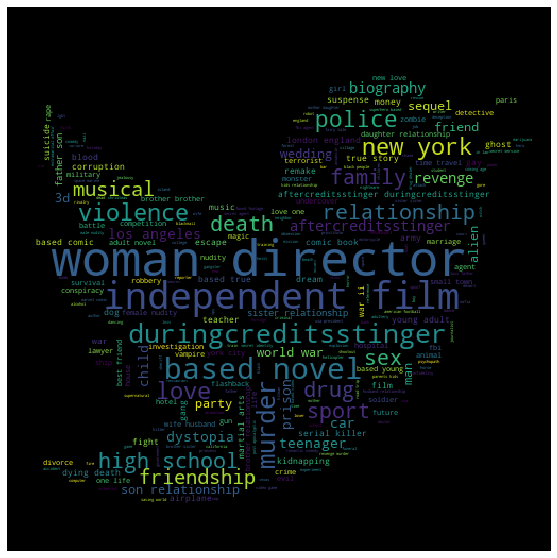

In [39]:
plt.subplots(figsize = (12,12))

stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

f1 = open("mask.png", "wb")
f1.write(codecs.decode(mask,'base64'))
f1.close()

img1 = imageio.imread('mask.png')
#img1 = imread("mask.png")

hcmask1 = img1

words = movies['keywords'].dropna().apply(nltk.word_tokenize)
word = []

for i in words:
    word.extend(i)
word = pd.Series(word)

word = ([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color = "black", max_words = 4000, mask = hcmask1,
               stopwords = STOPWORDS, max_font_size = 60,width = 1000,height = 1000)
wc.generate(" ".join(word))

plt.imshow(wc)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
#Above is a wordcloud showing the major keywords or tags used for describing the movies.

In [40]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')

In [41]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [44]:
def binary(words):
    binaryList = []
    
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [45]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))

In [46]:
movies=movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies=movies[movies['director']!='']

In [ ]:
#Checking similarity between movies

In [47]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [48]:
 #lets check similarity between any 2 random movies
Similarity(3,160)

2.7958758547680684

In [49]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [AnneHathaway, ChristianBale, GaryOldman, Mich...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Action, Adventure, Animation, Comedy, Family,...
cast              [Gerard

In [50]:
new_id = list(range(0,movies.shape[0]))
movies['new_id'] = new_id
movies = movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head(2)

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [52]:
import operator

def whats_my_score(name):
    print('Enter a movie title')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ', new_movie.original_title.values[0])
    
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [ ]:
#Let's check our prediction for Godfather

In [53]:
whats_my_score('Godfather')

Enter a movie title
Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Crime','Drama' | Rating: 8.3
The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
The Rainmaker | Genres: 'Crime','Drama','Thriller' | Rating: 6.7
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
The Conversation | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
The Cotton Club | Genres: 'Crime','Drama','Music','Romance' | Rating: 6.6
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
Twixt | Genres: 'Horror','Thriller' | Rating: 5.0
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Peggy Sue Got Married | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 5.9


The predicted rating for The Godfather: Part III is: 6.950000
The actual rating for The Godfather: Part III is 7.100000


In [54]:
whats_my_score('Minions')

Enter a movie title
Selected Movie:  Minions

Recommended Movies: 

Mr. Peabody & Sherman | Genres: 'Adventure','Animation','Family' | Rating: 6.7
Cars 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.8
Up | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.7
Wreck-It Ralph | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 7.1
Bolt | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3
Bee Movie | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.7
Flushed Away | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.0
Penguins of Madagascar | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.5
Kung Fu Panda | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.9
Rio 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.3


The predicted rating for Minions is: 6.500000
The actual rating for Minions is 6.400000


In [55]:
whats_my_score('Balboa')

Enter a movie title
Selected Movie:  Rocky Balboa

Recommended Movies: 

Rocky | Genres: 'Drama' | Rating: 7.5
The Expendables | Genres: 'Action','Adventure','Thriller' | Rating: 6.0
Creed | Genres: 'Drama' | Rating: 7.3
Australia | Genres: 'Drama' | Rating: 6.3
The Perfect Storm | Genres: 'Drama' | Rating: 6.2
The Aviator | Genres: 'Drama' | Rating: 7.0
Ali | Genres: 'Drama' | Rating: 6.7
Ben-Hur | Genres: 'Drama' | Rating: 5.3
Cold Mountain | Genres: 'Drama' | Rating: 6.7
Dreamgirls | Genres: 'Drama' | Rating: 6.6


The predicted rating for Rocky Balboa is: 6.560000
The actual rating for Rocky Balboa is 6.500000


In [57]:
whats_my_score('Avatar')

Enter a movie title
Selected Movie:  Avatar

Recommended Movies: 

The Abyss | Genres: 'Action','Adventure','ScienceFiction','Thriller' | Rating: 7.1
Aliens | Genres: 'Action','Horror','ScienceFiction','Thriller' | Rating: 7.7
Terminator 2: Judgment Day | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.7
The Terminator | Genres: 'Action','ScienceFiction','Thriller' | Rating: 7.3
True Lies | Genres: 'Action','Thriller' | Rating: 6.8
Star Trek Into Darkness | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Guardians of the Galaxy | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.9
Clash of the Titans | Genres: 'Action','Adventure','Fantasy' | Rating: 5.6
Superman Returns | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 5.4
Man of Steel | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.5


The predicted rating for Avatar is: 6.940000
The actual rating for Avatar is 7.200000


In [56]:
movies

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,"[Action, Crime, Thriller]",6.6,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4718,Robert Rodriguez,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4799,Newlyweds,"[Comedy, Romance]",5.9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4719,Edward Burns,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4800,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]",7.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4720,Scott Smith,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4801,Shanghai Calling,[],5.7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4721,Daniel Hsia,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
